<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [481]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [656]:
df = pd.read_csv("/content/t.csv")
df

,month,spi1,sl1,avg R.HUM,avg temp
0,01-05-1980,-1.469306,-1.469306,0.856281,22.978145
1,01-06-1980,0.364798,-1.469306,0.942733,23.261097
2,01-07-1980,0.606144,0.364798,0.903878,24.600967
3,01-08-1980,0.606144,0.606144,0.882303,24.909726
4,01-09-1980,1.001410,0.606144,0.833859,23.641217
...,...,...,...,...,...
404,01-01-2014,0.317544,0.143235,0.682444,27.362823
405,01-02-2014,0.546507,0.317544,0.783198,23.614450
406,01-03-2014,0.629004,0.546507,0.946414,23.285097
407,01-04-2014,0.174373,0.629004,0.959161,24.194050


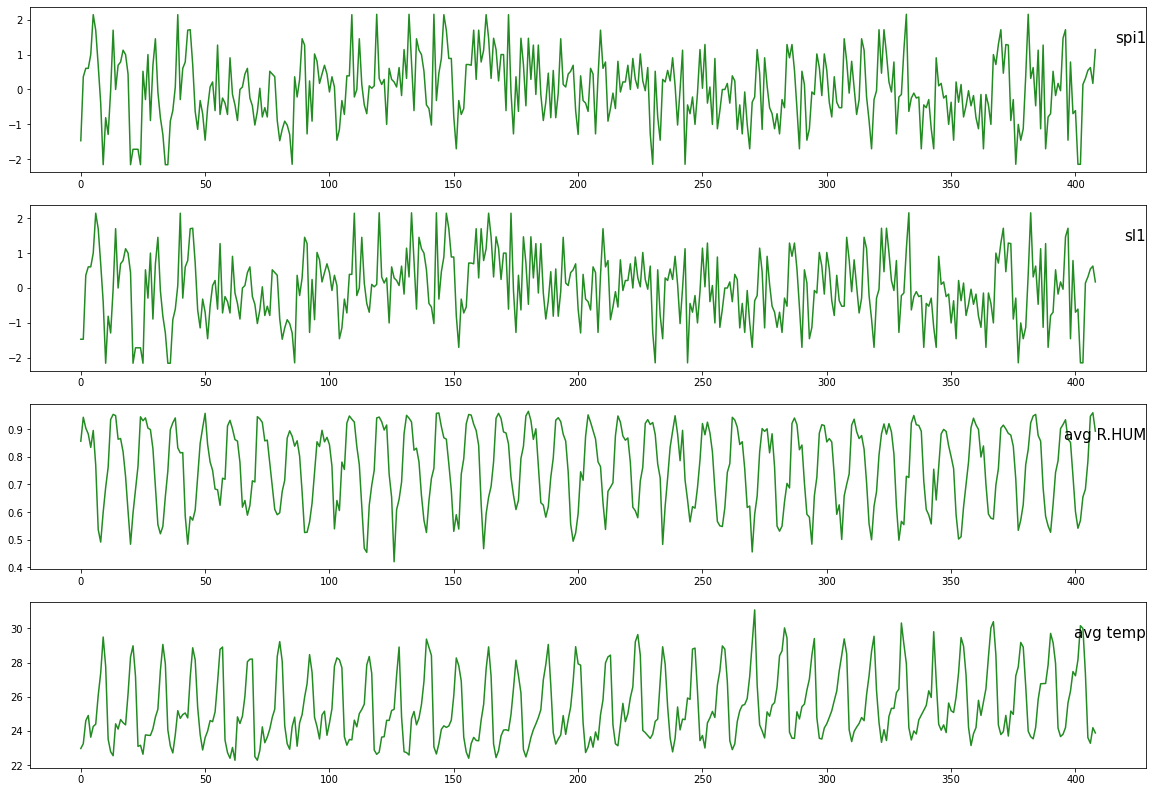

In [658]:
values = df.values

# specify columns to plot
groups = [1, 2, 3,4]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

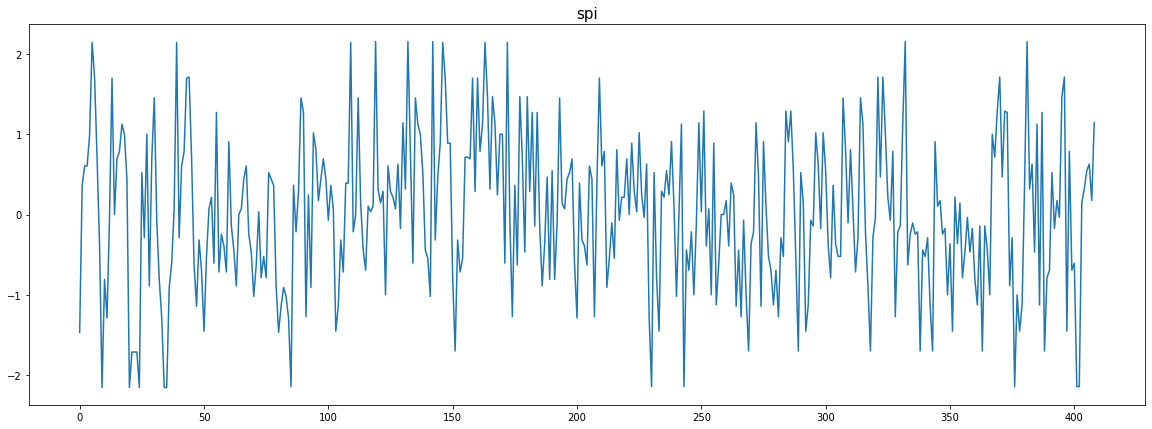

In [659]:
fig = plt.figure(figsize = (20,7))
plt.plot(df.spi1)
plt.title("spi", fontsize = 15)
plt.show()

In [660]:
del df["month"]

In [661]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [662]:
# Scaling the entire dataset

dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [663]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [664]:
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)
reframed

(408, 8)


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,0.159405,0.159405,0.801607,0.078166,0.584563,0.159405,0.960588,0.110365
2,0.584563,0.159405,0.960588,0.110365,0.640508,0.584563,0.889136,0.262840
3,0.640508,0.584563,0.889136,0.262840,0.640508,0.640508,0.849461,0.297976
4,0.640508,0.640508,0.849461,0.297976,0.732133,0.640508,0.760374,0.153622
5,0.732133,0.640508,0.760374,0.153622,0.997405,0.732133,0.872728,0.224777
...,...,...,...,...,...,...,...,...
404,0.533203,0.002595,0.431019,0.876801,0.573609,0.533203,0.481930,0.577135
405,0.573609,0.533203,0.481930,0.577135,0.626684,0.573609,0.667212,0.150576
406,0.626684,0.573609,0.667212,0.150576,0.645807,0.626684,0.967357,0.113096
407,0.645807,0.626684,0.967357,0.113096,0.540421,0.645807,0.990799,0.216534


In [665]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
1   0.159405   0.159405   0.801607   0.078166  0.584563  0.159405  0.960588   
2   0.584563   0.159405   0.960588   0.110365  0.640508  0.584563  0.889136   
3   0.640508   0.584563   0.889136   0.262840  0.640508  0.640508  0.849461   
4   0.640508   0.640508   0.849461   0.297976  0.732133  0.640508  0.760374   
5   0.732133   0.640508   0.760374   0.153622  0.997405  0.732133  0.872728   

    var4(t)  
1  0.110365  
2  0.262840  
3  0.297976  
4  0.153622  
5  0.224777  


In [666]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var1(t)',
       'var2(t)', 'var3(t)', 'var4(t)'],
      dtype='object')

In [667]:
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed)

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1     0.159405   0.159405   0.801607   0.078166  0.584563
2     0.584563   0.159405   0.960588   0.110365  0.640508
3     0.640508   0.584563   0.889136   0.262840  0.640508
4     0.640508   0.640508   0.849461   0.297976  0.732133
5     0.732133   0.640508   0.760374   0.153622  0.997405
..         ...        ...        ...        ...       ...
404   0.533203   0.002595   0.431019   0.876801  0.573609
405   0.573609   0.533203   0.481930   0.577135  0.626684
406   0.626684   0.573609   0.667212   0.150576  0.645807
407   0.645807   0.626684   0.967357   0.113096  0.540421
408   0.540421   0.645807   0.990799   0.216534  0.765260

[408 rows x 5 columns]


In [668]:
values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 384

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(384, 1, 4) (384,) (24, 1, 4) (24,)


In [669]:
train.shape, test.shape, values.shape

((384, 5), (24, 5), (408, 5))

In [670]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam,RMSprop
import numpy as np
import matplotlib.pyplot as plt
train_X.shape

(384, 1, 4)

In [716]:
model = Sequential()
model.add(LSTM(1000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=0.2, verbose=2, shuffle=False)


Epoch 1/100
10/10 - 3s - loss: 0.1861 - val_loss: 0.0629 - 3s/epoch - 278ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0527 - val_loss: 0.0553 - 495ms/epoch - 49ms/step
Epoch 3/100
10/10 - 1s - loss: 0.0535 - val_loss: 0.0488 - 507ms/epoch - 51ms/step
Epoch 4/100
10/10 - 1s - loss: 0.0433 - val_loss: 0.0422 - 508ms/epoch - 51ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0444 - val_loss: 0.0425 - 477ms/epoch - 48ms/step
Epoch 6/100
10/10 - 1s - loss: 0.0440 - val_loss: 0.0437 - 1s/epoch - 100ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0443 - val_loss: 0.0437 - 486ms/epoch - 49ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0409 - val_loss: 0.0437 - 483ms/epoch - 48ms/step
Epoch 9/100
10/10 - 1s - loss: 0.0424 - val_loss: 0.0442 - 530ms/epoch - 53ms/step
Epoch 10/100
10/10 - 0s - loss: 0.0425 - val_loss: 0.0441 - 491ms/epoch - 49ms/step
Epoch 11/100
10/10 - 1s - loss: 0.0431 - val_loss: 0.0439 - 501ms/epoch - 50ms/step
Epoch 12/100
10/10 - 0s - loss: 0.0434 - val_loss: 0.0441 - 490ms/epoch - 49ms/step
Epoch

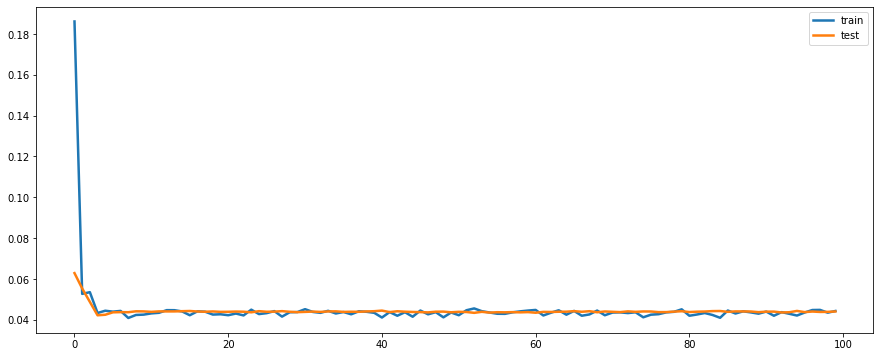

In [717]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [676]:
test_X.shape

(24, 1, 4)

In [709]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

(24, 1)
(24,)


In [580]:
test.shape

(10, 7)

In [ ]:
print(test), print(test.shape)

In [710]:
y_test_true = test[:,4]

In [711]:
poll = np.array(df["spi1"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

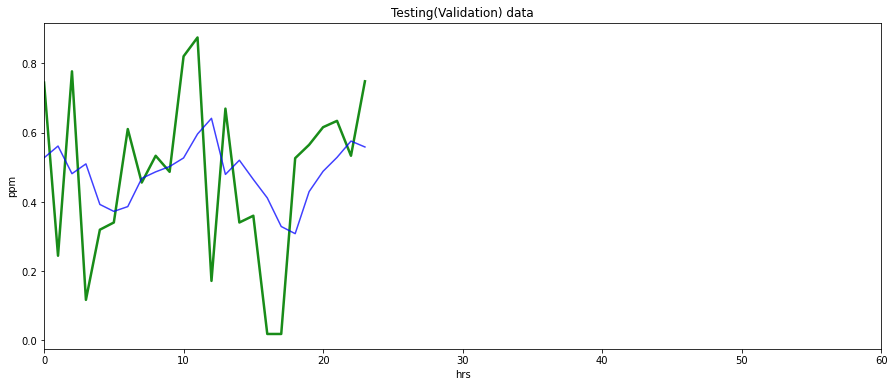

In [712]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,60])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

# testTrue = scaler.inverse_transform([testY]).ravel()

In [713]:
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)
r=r2_score(y_test_true, testPredict)
print(r)
# As we see the,  RMSE for testing data is low, and visually as well, from the above plots, we can see that the basic model is able to
# predict the future values of pollution (in ppm) pretty well

Test(Validation) RMSE = 0.23220392
0.07576492423505621
